<a href="https://colab.research.google.com/github/AbdirayimovS/KNN_from_Scratch/blob/main/KNN_from_SCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

In [ ]:
def plt_iris_dataset(iris_dataset):
    plt.title("Iris")
    plt.scatter(iris_dataset.data[:, 0], iris_dataset.data[:, 1], c=iris_dataset.target)
    formatter = plt.FuncFormatter(lambda i, *args: iris_dataset.target_names[int(i)])
    plt.colorbar(ticks=[0,1,2], format=formatter)
    plt.tight_layout()
    plt.show()


For calculating the distance there are three formulas: one of them is euclidean_distance, and so on 
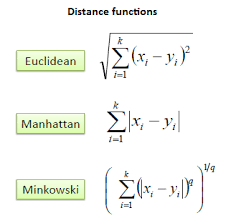


1. Load the Data.
2. Initialize the value of K.
3. For predicting the output class for the test data, iterate from 1st data point to the total number of data points.
3.1 Calculate distance between test data and each row of training data by the help of euclidean distance.
3.2 Sort the calculated distance in ascending order.
3.3 Get the top K rows from the sorted array.
3.4 Now find out the most frequent class of the rows.
3.5 Return the predicted class for the test data.


In [ ]:
class KNN:
    def __init__(self, X,y,k,classification=True):
        self.X_train = X
        self.Y_train = y
        self.k = k 
        self.classification = classification
    def _euclidean_distance(self, point1, point2):
        euc_dist = np.linalg.norm(point1-point2)
        return euc_dist
    def _get_k_neighbors(self, point1):
        distances = []
        for point2 in self.X_train:
            distances.append(self._euclidean_distance(point1, point2))
        distances = np.asarray(distances)
        indices = np.argpartition(distances, self.k)
        k_first_indices = indices[:self.k]
        return k_first_indices
    def predict_class(self, point1):
        knn_indices = self._get_k_neighbors(point1)
        knn_labels = []
        for i in knn_indices:
            knn_labels.append(self.Y_train[i])
        
        if self.classification:
            occurences = np.bincount(knn_labels)
            mode = np.argmax(occurences)
            return mode
        else: pass

    def get_evaluation(self, Y_test,ypreds):
        SETOSA_SETOSA = np.sum(np.logical_and(ypreds == 0, Y_test == 0))
        SETOSA_VERSICOLOR = np.sum(np.logical_and(ypreds == 0, Y_test == 1))
        SETOSA_VERGINICA = np.sum(np.logical_and(ypreds == 0, Y_test == 2))
        VERSICOLOR_SETOSA = np.sum(np.logical_and(ypreds == 2, Y_test == 0))
        VERSICOLOR_VERSICOLOR = np.sum(np.logical_and(ypreds == 1, Y_test == 1))
        VERSICOLOR_VERGINICA = np.sum(np.logical_and(ypreds == 1, Y_test == 2))
        VERGINICA_SETOSA = np.sum(np.logical_and(ypreds == 2, Y_test == 0))
        VERGINICA_VERSICOLOR = np.sum(np.logical_and(ypreds == 2, Y_test == 1))
        VERGINICA_VERGINICA = np.sum(np.logical_and(ypreds == 2, Y_test == 2))
        ALL = SETOSA_SETOSA + SETOSA_VERGINICA + SETOSA_VERSICOLOR + \
        VERSICOLOR_VERSICOLOR + VERSICOLOR_SETOSA + VERSICOLOR_VERGINICA +\
        VERGINICA_SETOSA + VERGINICA_VERGINICA + VERGINICA_VERSICOLOR

        ACCURACY = (SETOSA_SETOSA + VERSICOLOR_VERSICOLOR + VERGINICA_VERGINICA)/(ALL)  
        PRECISION_SETOSA = SETOSA_SETOSA/(SETOSA_SETOSA + SETOSA_VERGINICA + SETOSA_VERSICOLOR) 
        RECALL_SETOSA = SETOSA_SETOSA/(SETOSA_SETOSA + VERSICOLOR_SETOSA + VERGINICA_SETOSA) 
        F1_SCORE_SETOSA = 2*PRECISION_SETOSA*RECALL_SETOSA/(PRECISION_SETOSA + RECALL_SETOSA) 
        PRECISION_VERSICOLOR = VERSICOLOR_VERSICOLOR/(VERSICOLOR_VERSICOLOR + VERSICOLOR_VERGINICA + VERSICOLOR_SETOSA)
        RECALL_VERSICOLOR = VERSICOLOR_VERSICOLOR/ (VERSICOLOR_VERSICOLOR + SETOSA_VERSICOLOR + VERGINICA_VERSICOLOR)
        F1_SCORE_VERSICOLOR = 2*PRECISION_VERSICOLOR*RECALL_VERSICOLOR/(PRECISION_VERSICOLOR + RECALL_VERSICOLOR) 
        PRECISION_VERGINICA = VERGINICA_VERGINICA/(VERGINICA_VERSICOLOR + VERGINICA_VERGINICA + VERGINICA_SETOSA)
        RECALL_VERGINICA = VERGINICA_VERGINICA/ (VERGINICA_VERGINICA + SETOSA_VERGINICA + VERGINICA_VERGINICA)
        F1_SCORE_VERGINICA = 2*PRECISION_VERGINICA*RECALL_VERGINICA/(PRECISION_VERGINICA + RECALL_VERGINICA) 
        return pd.DataFrame({'Setosa': [SETOSA_SETOSA, SETOSA_VERGINICA, SETOSA_VERSICOLOR], 
                             'Versicolor': [VERSICOLOR_SETOSA, VERSICOLOR_VERSICOLOR, VERSICOLOR_VERGINICA],
                             'Verginica': [VERGINICA_SETOSA, VERGINICA_VERSICOLOR, VERGINICA_VERGINICA],
                             'precision':[PRECISION_SETOSA, PRECISION_VERSICOLOR, PRECISION_VERGINICA],
                             'Recall': [RECALL_SETOSA, RECALL_VERSICOLOR, RECALL_VERGINICA],
                             'F1_Score': [F1_SCORE_SETOSA, F1_SCORE_VERSICOLOR, F1_SCORE_VERGINICA],
                             'Accuracy': [ACCURACY, ACCURACY, ACCURACY]}, index = ['Setosa', 'Versicolor', "Verginica"])
        


In [ ]:
target_names = ['setosa', 'versicolor', 'virginica']

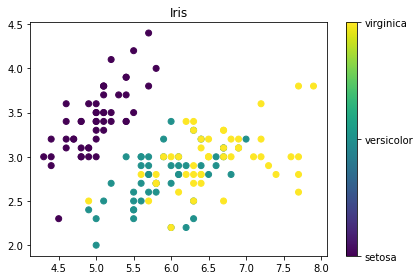

In [ ]:
iris_dt = datasets.load_iris()
X,Y = iris_dt.data, iris_dt.target

plt_iris_dataset(iris_dt)

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.35, shuffle=True)





In [ ]:
K = [1,3,5,7,9,11, 13]
for k in K:
    model = KNN(X_train, Y_train, k)
    ypreds = []
    for i in X_test:
        ypreds.append(model.predict_class(i))
    acc = model.get_evaluation(Y_test, np.array(ypreds))
    print(acc)

            Setosa  Versicolor  Verginica  precision    Recall  F1_Score  \
Setosa          20           0          0   1.000000  1.000000  1.000000   
Versicolor       0          16          2   0.888889  0.888889  0.888889   
Verginica        0           2         13   0.866667  0.500000  0.634146   

            Accuracy  
Setosa      0.924528  
Versicolor  0.924528  
Verginica   0.924528  
            Setosa  Versicolor  Verginica  precision    Recall  F1_Score  \
Setosa          20           0          0   1.000000  1.000000  1.000000   
Versicolor       0          16          2   0.941176  0.888889  0.914286   
Verginica        0           1         14   0.875000  0.500000  0.636364   

            Accuracy  
Setosa      0.943396  
Versicolor  0.943396  
Verginica   0.943396  
            Setosa  Versicolor  Verginica  precision    Recall  F1_Score  \
Setosa          20           0          0   1.000000  1.000000  1.000000   
Versicolor       0          16          2   1.000000  

Sourse: https://medium.datadriveninvestor.com/knn-algorithm-and-implementation-from-scratch-b9f9b739c28f